<a href="https://colab.research.google.com/github/ppimpxm/Halloween-candies/blob/main/Copy_of_Halloween's_candy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
from zipfile import ZipFile
import pandas as pd

# Set the Kaggle API key environment variables
os.environ['siriyapornpim'] = 'username'
os.environ['cad31aafb88c429e6f08c2b005af0b83'] = 'API key'

# Download the World Happiness Report dataset
!kaggle datasets download -d fivethirtyeight/the-ultimate-halloween-candy-power-ranking


# Load and display the dataset (adjust the file name based on the year you want)
mydata = pd.read_csv('candy-data.csv')
print(mydata.head())


Dataset URL: https://www.kaggle.com/datasets/fivethirtyeight/the-ultimate-halloween-candy-power-ranking
License(s): other
the-ultimate-halloween-candy-power-ranking.zip: Skipping, found more recently modified local copy (use --force to force download)
  competitorname  chocolate  fruity  caramel  peanutyalmondy  nougat  \
0      100 Grand          1       0        1               0       0   
1   3 Musketeers          1       0        0               0       1   
2       One dime          0       0        0               0       0   
3    One quarter          0       0        0               0       0   
4      Air Heads          0       1        0               0       0   

   crispedricewafer  hard  bar  pluribus  sugarpercent  pricepercent  \
0                 1     0    1         0         0.732         0.860   
1                 0     0    1         0         0.604         0.511   
2                 0     0    0         0         0.011         0.116   
3                 0     0  

In [ ]:
mydata

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Twizzlers,0,1,0,0,0,0,0,0,0,0.220,0.116,45.466282
81,Warheads,0,1,0,0,0,0,1,0,0,0.093,0.116,39.011898
82,WelchÕs Fruit Snacks,0,1,0,0,0,0,0,0,1,0.313,0.313,44.375519
83,WertherÕs Original Caramel,0,0,1,0,0,0,1,0,0,0.186,0.267,41.904308


# Hypothesis 1
Reese peanut butter cup is the most popular candy during Halloweeen

In [ ]:
# Hyp 1: Reese peanut buttercup is the most popular candy during Halloween

# Check what is The most favorite Halloween's candy

mydata = mydata[['competitorname','winpercent']]
max_index = mydata['winpercent'].idxmax()
most_favorite_candy = mydata.loc[max_index]

most_favorite_candy


,52
competitorname,ReeseÕs Peanut Butter cup
winpercent,84.18029


In [ ]:
# Check the win percent of Reese
reese_winpercent = mydata.loc[mydata['competitorname'] == 'ReeseÕs Peanut Butter cup', 'winpercent'].values[0]
reese_winpercent

84.18029

<ipython-input-9-544668bc71ba>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='competitorname', y='winpercent', data= top_10, palette='viridis')


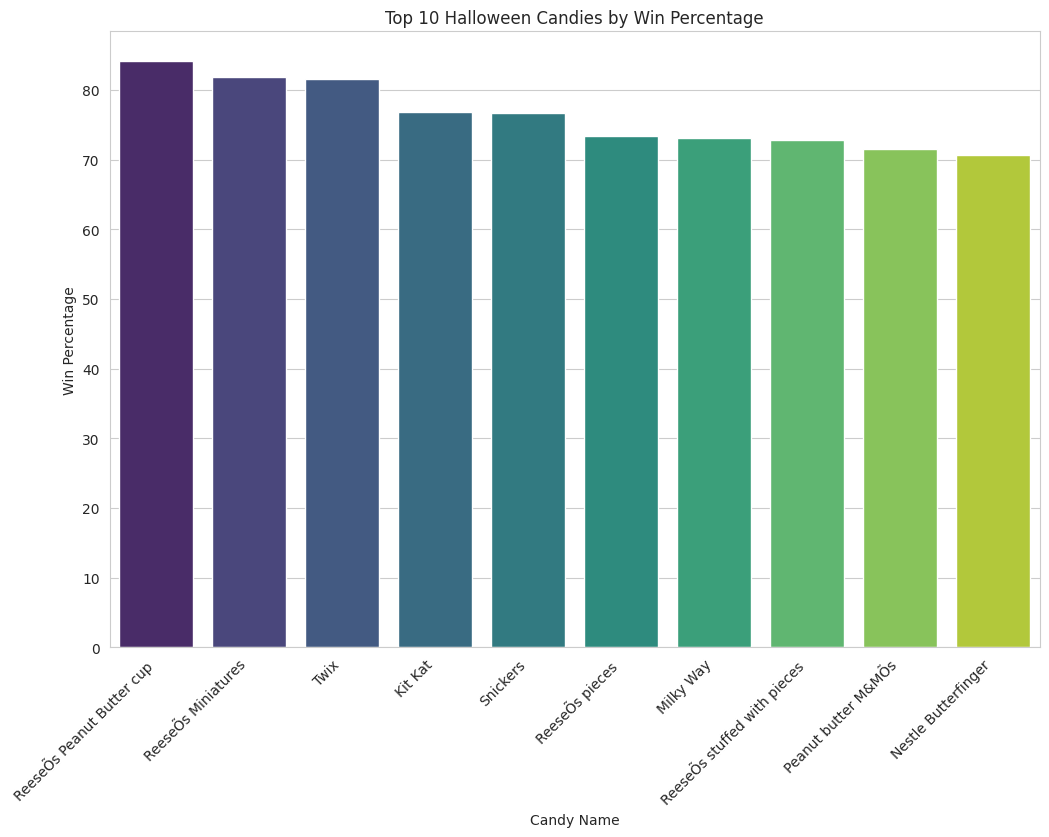

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# sort the data to see the top 10 candies
top_10 = mydata.sort_values(by='winpercent', ascending=False).head(10)

sns.set_style('whitegrid')

plt.figure(figsize=(12, 8))
sns.barplot(x='competitorname', y='winpercent', data= top_10, palette='viridis')

plt.xticks(rotation=45, ha='right')

plt.xlabel('Candy Name')
plt.ylabel('Win Percentage')
plt.title('Top 10 Halloween Candies by Win Percentage')

plt.show()

# **Analysis**
The bar chart shows that Reese peanut buttercup is the most popular candy during Halloween based on the win percentage, as it ranks first in the chart.


# **Null hypothesis**
The win percentage of Reese's Peanut Butter Cup is not different from the win percentage of other Halloween candies.
# **Alternative hypothesis**
Reese peanut buttercup is the most popular candy during Halloween

In [43]:
import pandas as pd
from scipy import stats

# Assuming 'mydata' is your DataFrame
other_candies_winpercent = mydata.loc[mydata['competitorname'] != 'ReeseÕs Peanut Butter cup', 'winpercent']

t_statistic, p_value = stats.ttest_1samp(other_candies_winpercent, reese_winpercent, alternative='less')

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis.")
    print("There is evidence to suggest that Reese's win percentage is higher than other candies.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is not enough evidence to suggest that Reese's win percentage is higher than other candies.")

T-statistic: -21.927341263739248
P-value: 1.3917146484154009e-36
Reject the null hypothesis.
There is evidence to suggest that Reese's win percentage is higher than other candies.


In [47]:
other_candies_winpercent


,winpercent
0,66.971725
1,67.602936
2,32.261086
3,46.116505
4,52.341465
...,...
80,45.466282
81,39.011898
82,44.375519
83,41.904308


In [55]:
import pandas as pd
from scipy import stats

# Assuming 'mydata' is your DataFrame
other_candies_winpercent = mydata.loc[mydata['competitorname'] != 'ReeseÕs Peanut Butter cup', 'winpercent']

t_statistic, p_value = stats.ttest_1samp(other_candies_winpercent, reese_winpercent, alternative='greater')

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis.")
    print("There is evidence to suggest that other candies win percent is higher than Reese's win percent.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is not enough evidence to suggest that other candies win percent is higher than Reese's win percent.")

T-statistic: -17.184578478481935
P-value: 1.0
Fail to reject the null hypothesis.
There is not enough evidence to suggest that other candies win percent is higher than Reese's win percent.


# Hypothesis 2
Chocolate is the most popular ingredient in Halloween's candy

In [ ]:
mydata2 = mydata.drop(['competitorname','pluribus','pricepercent','winpercent','sugarpercent'], axis=1)
mydata_sum = mydata2.sum()

mydata_sum



,0
chocolate,37
fruity,38
caramel,14
peanutyalmondy,14
nougat,7
crispedricewafer,7
hard,15
bar,21


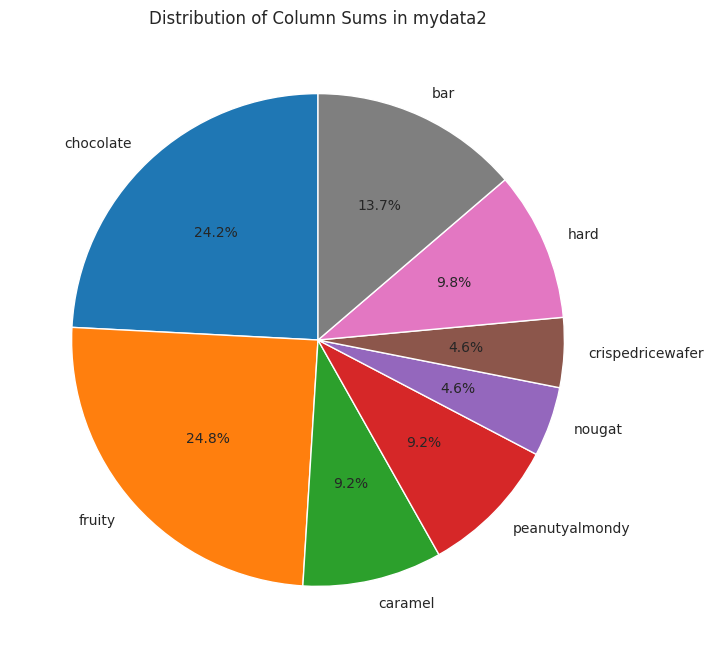

In [ ]:
import matplotlib.pyplot as plt

mydata_sum_df = pd.DataFrame(mydata_sum, columns=['Sum'])

# Create the pie chart
plt.figure(figsize=(8, 8))  # Adjust figure size if needed
plt.pie(mydata_sum.values, labels=mydata_sum.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Column Sums in mydata2')
plt.show()



# Analysis
 From the pie chart above, it shows that the most popular attribute in Halloween's candy is not Chocolate(24.2%). Fruity has the highest percentage of popularity (24.8%), followed by chocolate in second place and bars in third place (13.7%).

# **Null Hypothesis for Hypothesis 2**
The frequency of chocolate as an feature in Halloween candies is no different than the frequency of other ingredients.
# **Alternative hypothesis for Hypothesis 2**
Chocolate is the most often used ingredient/feature in Halloween candy.


In [ ]:
#Drop chocolate column (Other candies)
hypo2 = mydata2.drop(['chocolate'], axis=1)


In [ ]:
hypo2.mean()

,0
fruity,0.447059
caramel,0.164706
peanutyalmondy,0.164706
nougat,0.082353
crispedricewafer,0.082353
hard,0.176471
bar,0.247059


In [ ]:
mydata['chocolate'].mean()

0.43529411764705883

In [ ]:
from scipy import stats

# Perform one-tailed t-test (alternative='greater')
t_statistic, p_value = stats.ttest_ind(mydata['chocolate'].mean(), hypo2.mean(), alternative='greater')

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

#Interpret the results
alpha = 0.05 #Significant level
if p_value < alpha:
  print("Reject the null hypothesis.")
  print("There is evidence to suggest that chocolate is the most often used ingredient/feature in Halloween candy.")
else:
  print("Fail to reject the null hypothesis.")
  print("There is not enough evidence to suggest that chocolate is the most often used ingredient/feature in Halloween candy.")

T-statistic: 1.7980192164898514
P-value: 0.06114370372125492
Fail to reject the null hypothesis.
There is not enough evidence to suggest that chocolate is the most often used ingredient/feature in Halloween candy.


In [68]:
from scipy import stats

#Drop chocolate column (Other candies)
dropbar = mydata2.drop(['bar'], axis=1)

# Perform one-tailed t-test (alternative='greater')
t_statistic, p_value = stats.ttest_ind(mydata['bar'].mean(), dropbar.mean(), alternative='greater')

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

#Interpret the results
alpha = 0.05 #Significant level
if p_value < alpha:
  print("Reject the null hypothesis.")
  print("There is evidence to suggest that bar is the most often used ingredient/feature in Halloween candy.")
else:
  print("Fail to reject the null hypothesis.")
  print("There is not enough evidence to suggest that bar is the most often used ingredient/feature in Halloween candy.")

T-statistic: 0.15233333694419762
P-value: 0.4419587458629921
Fail to reject the null hypothesis.
There is not enough evidence to suggest that bar is the most often used ingredient/feature in Halloween candy.


In [70]:
from scipy import stats

#Drop chocolate column (Other candies)
dropbar = mydata2.drop(['fruity'], axis=1)

# Perform one-tailed t-test (alternative='greater')
t_statistic, p_value = stats.ttest_ind(mydata['fruity'].mean(), dropbar.mean(), alternative='greater')

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

#Interpret the results
alpha = 0.05 #Significant level
if p_value < alpha:
  print("Reject the null hypothesis.")
  print("There is evidence to suggest that fruity is the most often used ingredient/feature in Halloween candy.")
else:
  print("Fail to reject the null hypothesis.")
  print("There is not enough evidence to suggest that fruity is the most often used ingredient/feature in Halloween candy.")

T-statistic: 1.9603227205078568
P-value: 0.048825727695441065
Reject the null hypothesis.
There is evidence to suggest that fruity is the most often used ingredient/feature in Halloween candy.


# Hypothesis 3
 chocolate and caramel is the combination of ingredient or feature with the highest correlation

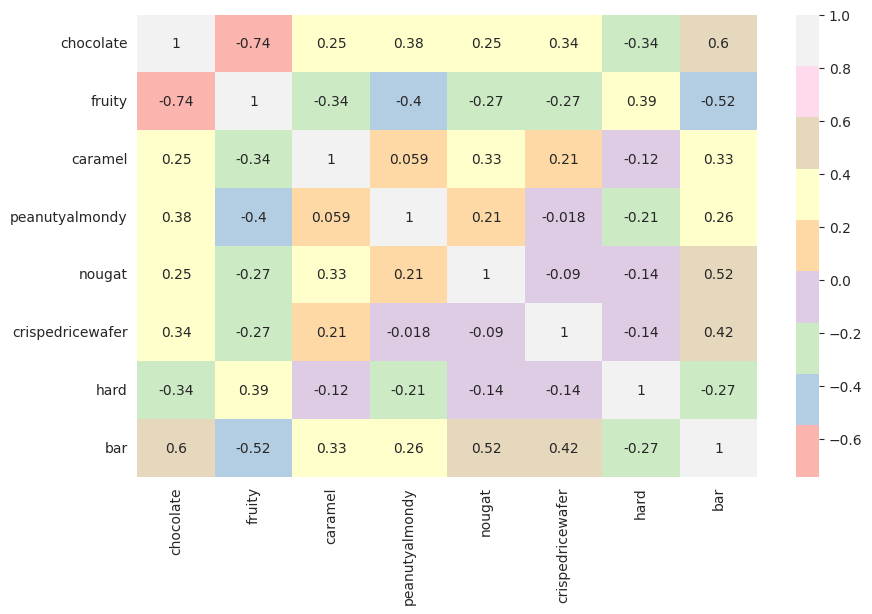

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'competitorname' is the only non-numeric column you want to exclude
mydata3 = mydata2.select_dtypes(include=['number']) # Select only numeric columns

plt.figure(figsize=(10, 6))

sns.heatmap(mydata3.corr(), annot=True, cmap='Pastel1')  # Annotation (with numbers)
plt.show()

# Analysis
From the heat map above, it shows the correlation between each variable. The combination of attribute with the most correlation is not chocolate and caremel (0.25), but chocolate and bar (0.6) because the correlation coefficient is closer to 1, which means there is a strong positive correlation between the chocolate and bar
.

# **Null hypothesis for hypothesis 3**
There is no significant correlation between the presence of chocolate and caramel in Halloween candies

# **Alternative hypothesis for hypothesis 3**
Chocolate and caramel is the combination of ingredient or feature with the highest correlation

In [ ]:
choco_caramel = mydata['chocolate'].corr(mydata['caramel'])
choco_caramel

0.24987534731992408

In [ ]:
drop3 = mydata2.drop(['caramel','chocolate'], axis=1)
hypo3 = drop3.corrwith(mydata['chocolate'])
hypo3

,0
fruity,-0.741721
peanutyalmondy,0.377824
nougat,0.254892
crispedricewafer,0.341210
hard,-0.344177
bar,0.597421


In [ ]:
from scipy import stats

# Perform one-tailed t-test (alternative='greater')
t_statistic, p_value = stats.ttest_ind(choco_caramel, hypo3 , alternative='greater')

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

alpha = 0.05

#Interpret the results
if p_value < alpha:
  print("Reject the null hypothesis.")
  print("There is evidence to suggest that chocolate and caramel is the combination of ingredient or feature with the highest correlation")
else:
  print("Fail to reject the null hypothesis.")
  print("There is not enough evidence to suggest that chocolate and caramel is the combination of ingredient or feature with the highest correlation")

T-statistic: 0.30557253505433846
P-value: 0.38612137362771903
Fail to reject the null hypothesis.
There is not enough evidence to suggest that chocolate and caramel is the combination of ingredient or feature with the highest correlation
